In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/jetblue_NYairports_featureEngineering_df.csv')

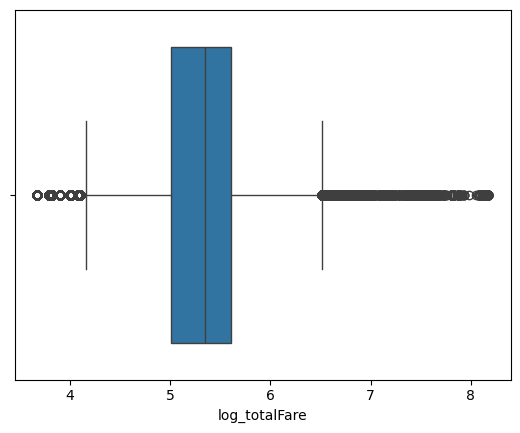

Q1: 5.01
Q3: 5.61
IQR: 0.60
Lower bound: 4.10, Upper bound: 6.51
Amount of outliers: 106,291, Amount of inliers: 3,843,189


count    3,949,480.00
mean             5.32
std              0.52
min              3.68
25%              5.01
50%              5.35
75%              5.61
max              8.17
Name: log_totalFare, dtype: object

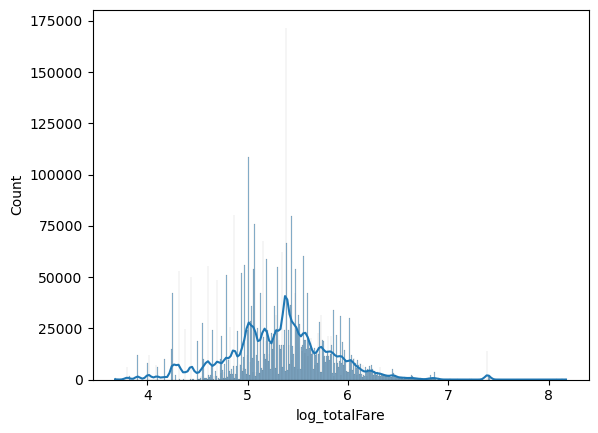

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data['log_totalFare'] = np.log1p(data['totalFare'])


# Boxplot
sns.boxplot(data, x='log_totalFare')
plt.show()

# Calculate bounds
q1, q3 = data['log_totalFare'].quantile([0.25, 0.75])
IQR = q3 - q1
lower_bound, upper_bound = q1 - 1.5 * IQR, q3 + 1.5 * IQR

# Print results
print(f'Q1: {q1:.2f}')
print(f'Q3: {q3:.2f}')
print(f'IQR: {IQR:.2f}')
print(f'Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}')

# Identify and count outliers
outliers = data[(data['log_totalFare'] < lower_bound) | (data['log_totalFare'] > upper_bound)]
inliers=len(data) - outliers.shape[0]
print(f'Amount of outliers: {outliers.shape[0]:,}, Amount of inliers: {inliers:,}')


sns.histplot(data['log_totalFare'],kde=True)
data['log_totalFare'].describe().apply(lambda x: f'{x:,.2f}')

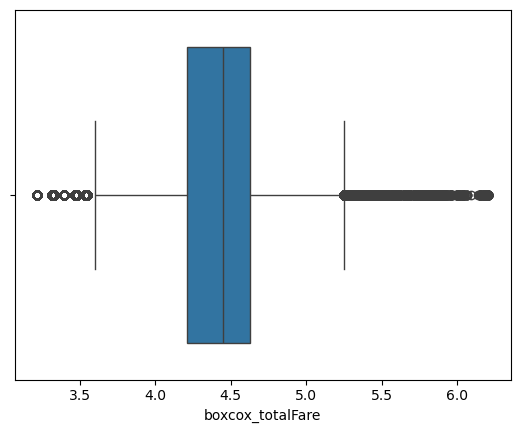

Q1: 4.21
Q3: 4.63
IQR: 0.42
Lower bound: 3.59, Upper bound: 5.25
Amount of outliers: 99,638, Amount of inliers: 3,849,842


count    3,949,480.00
mean             4.42
std              0.36
min              3.22
25%              4.21
50%              4.45
75%              4.63
max              6.21
Name: boxcox_totalFare, dtype: object

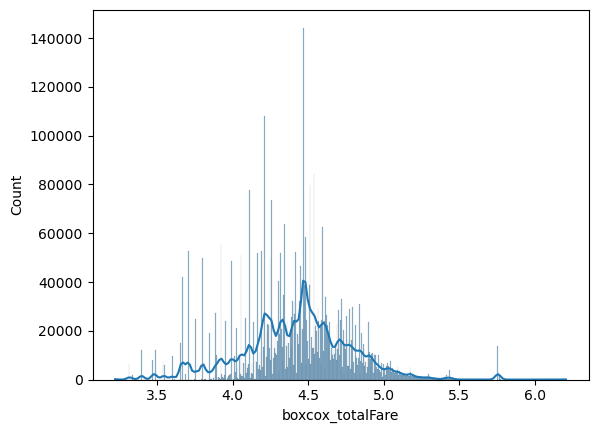

In [6]:
# Boxplot
jetblue_NY = pd.read_csv('../data/jetblue_NYairports_featureEngineering_df.csv')

from scipy.stats import boxcox
jetblue_NY['boxcox_totalFare'], _ = boxcox(jetblue_NY['totalFare'])

sns.boxplot(jetblue_NY, x='boxcox_totalFare')
plt.show()

# Calculate bounds
q1, q3 = jetblue_NY['boxcox_totalFare'].quantile([0.25, 0.75])
IQR = q3 - q1
lower_bound, upper_bound = q1 - 1.5 * IQR, q3 + 1.5 * IQR

# Print results
print(f'Q1: {q1:.2f}')
print(f'Q3: {q3:.2f}')
print(f'IQR: {IQR:.2f}')
print(f'Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}')

# Identify and count outliers
outliers = jetblue_NY[(jetblue_NY['boxcox_totalFare'] < lower_bound) | (jetblue_NY['boxcox_totalFare'] > upper_bound)]
inliers=len(jetblue_NY) - outliers.shape[0]
print(f'Amount of outliers: {outliers.shape[0]:,}, Amount of inliers: {inliers:,}')


sns.histplot(jetblue_NY['boxcox_totalFare'],kde=True)
jetblue_NY['boxcox_totalFare'].describe().apply(lambda x: f'{x:,.2f}')